### ARIMA
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR(P): Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I(d): Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA(q): Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [17]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})
import warnings 
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:xlabel='Month'>

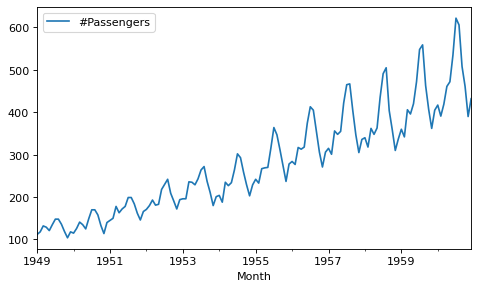

In [19]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
#drop null values
df.dropna(inplace=True)
df.plot()

In [20]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

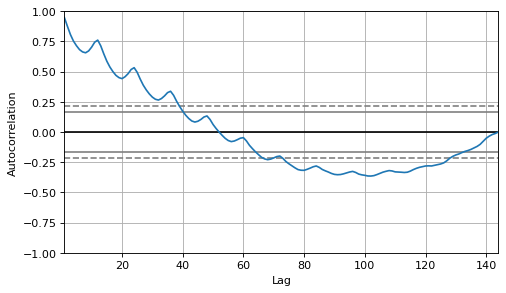

In [21]:
autocorrelation_plot(df)
plt.show()

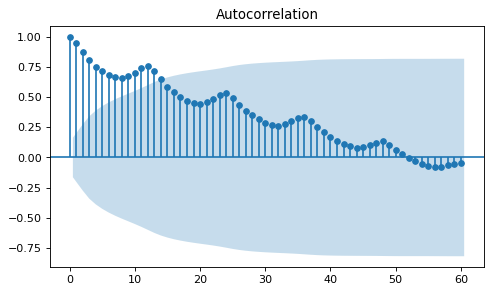

In [22]:
plot_acf(df, lags=60)
plt.show()

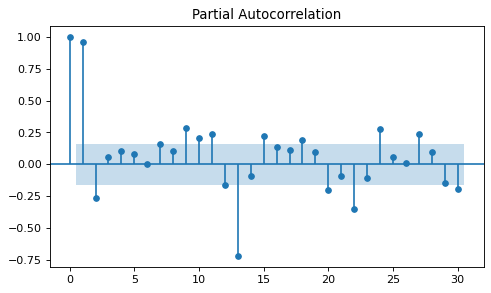

In [23]:
plot_pacf(df, lags=30)
plt.show()

In [24]:
result=adfuller(df['#Passengers'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

ADF Test Statistic : 0.815368879206053
p-value : 0.9918802434376411
#Lags Used : 13
Number of Observations : 130
weak evidence against null hypothesis,indicating it is non-stationary 


In [25]:
df['Sales First Difference'] = df['#Passengers'] - df['#Passengers'].shift(1)
df['Seasonal First Difference']=df['#Passengers']-df['#Passengers'].shift(12)
df.head(15)

,#Passengers,Sales First Difference,Seasonal First Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


In [26]:
df['Sales First Dif'] = df['#Passengers'].diff()
df['Seasonal First Dif']=df['#Passengers'].diff(12)
df.head(15)

,#Passengers,Sales First Difference,Seasonal First Difference,Sales First Dif,Seasonal First Dif
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,6.0,NaN
1949-03-01,132,14.0,NaN,14.0,NaN
1949-04-01,129,-3.0,NaN,-3.0,NaN
1949-05-01,121,-8.0,NaN,-8.0,NaN
1949-06-01,135,14.0,NaN,14.0,NaN
1949-07-01,148,13.0,NaN,13.0,NaN
1949-08-01,148,0.0,NaN,0.0,NaN
1949-09-01,136,-12.0,NaN,-12.0,NaN


In [27]:
# Again testing if data is stationary
adfuller(df['Seasonal First Difference'].dropna())

(-3.3830207264924805,
 0.011551493085514982,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.527129208137)

In [28]:
# Again testing if data is stationary
adfuller(df['Sales First Difference'].dropna())

(-2.829266824169997,
 0.05421329028382577,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [29]:
#divide into train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

<AxesSubplot:xlabel='Month'>

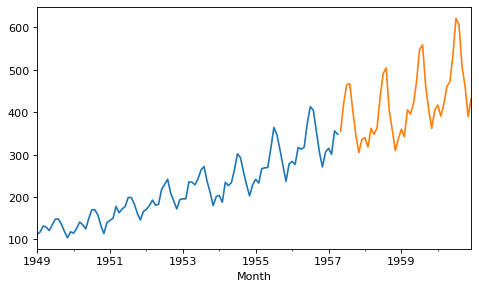

In [30]:
#plotting the data
train['#Passengers'].plot()
valid['#Passengers'].plot()

In [32]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import AutoARIMA

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
#building the model
model = pm.auto_arima(train['#Passengers'])
model.summary()

In [ ]:
forecasts = model.predict(n_periods=valid.shape[0])
forecasts
valid['forecasts'] = forecasts


In [ ]:
valid.head()

In [ ]:
train["#Passengers"].plot()
valid["#Passengers"].plot()
valid["forecasts"].plot()

In [ ]:
#building the model
model = pm.auto_arima(train['#Passengers'], seasonal=True, m=12)
model.summary()

In [ ]:
forecasts = model.predict(n_periods=valid.shape[0])
forecasts
valid['forecasts'] = forecasts

In [ ]:
train["#Passengers"].plot()
valid["#Passengers"].plot()
valid["forecasts"].plot()
labels = ['train', 'valid-actual', 'valid-forecast']
plt.legend(labels)